In [1]:
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pandas
import seaborn
seaborn.set_context({"figure.figsize": (16, 8)})
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

In [2]:
def do_plots(species, label, lengthticks=[3, 4, 5, 6],
             lengthticklabs=['1,000', '10,000', '100,000', '1,000,000'],
             lengthbins=numpy.linspace(2.75, 6.0, 40),
             gcbins=numpy.linspace(20, 80, 40)):
    ilocusdata = pandas.read_table('species/{}/{}.iloci.tsv'.format(species, species))
    milocusdata = pandas.read_table('species/{}/{}.miloci.tsv'.format(species, species))
    ilocusdata['LogLength'] = numpy.log10(ilocusdata['Length'])
    milocusdata['LogLength'] = numpy.log10(milocusdata['Length'])
    siloci = ilocusdata.loc[(ilocusdata.LocusClass == 'siLocus')]
    miloci = milocusdata.loc[(milocusdata.LocusClass == 'miLocus')]
    singleton_siloci = milocusdata.loc[(milocusdata.LocusClass == 'siLocus')]
    singleton_locuspos = [lp[6:-1] for lp in singleton_siloci['LocusPos']]
    milocus_siloci = siloci.loc[~(siloci.LocusPos.isin(singleton_locuspos))]
    fig, axes = plt.subplots(1, 2)
    ax1, ax2 = axes
    _ = ax1.hist(singleton_siloci['LogLength'], bins=lengthbins, alpha=0.5)
    _ = ax1.hist(milocus_siloci['LogLength'], bins=lengthbins, alpha=0.5)
    _ = ax1.set_title('siLocus Length ({})'.format(label))
    _ = ax1.set_xlabel('Length (bp)')
    _ = ax1.set_ylabel('Frequency')
    _ = ax1.legend(loc='upper right', labels=('Unmerged', 'Merged'))
    if lengthticks:
        _ = ax1.set_xticks(lengthticks)
    if lengthticklabs:
        _ = ax1.set_xticklabels(lengthticklabs)
    _ = ax2.hist(singleton_siloci['GCContent'] * 100, bins=gcbins, alpha=0.5)
    _ = ax2.hist(milocus_siloci['GCContent'] * 100, bins=gcbins, alpha=0.5)
    _ = ax2.set_title('siLocus Nucleotide Composition ({})'.format(label))
    _ = ax2.set_xlabel('% GC Content')
    _ = ax2.set_ylabel('Frequency')
    _ = ax2.legend(loc='upper right', labels=('Unmerged', 'Merged'))

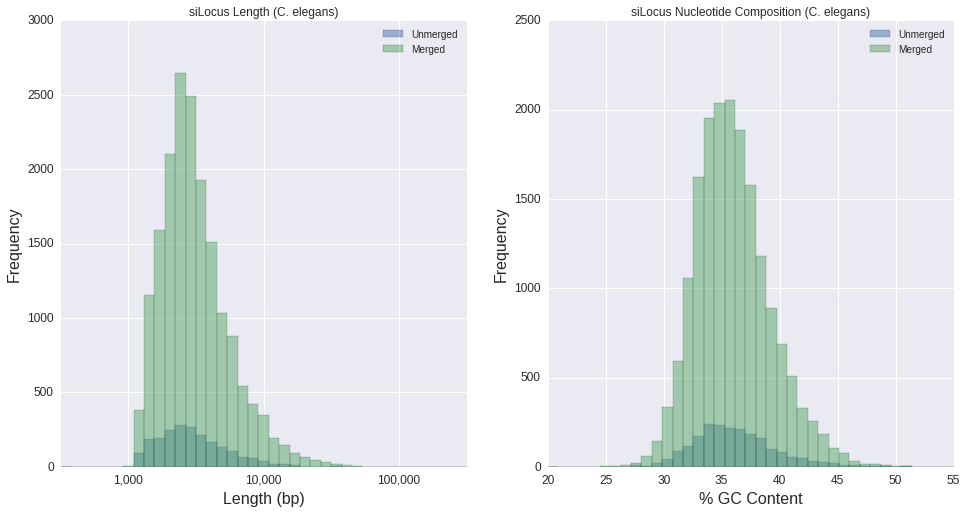

In [3]:
do_plots('Cele', 'C. elegans', lengthticks=[3, 4, 5], lengthticklabs=['1,000', '10,000', '100,000'],
         lengthbins=numpy.linspace(2.5, 5.5, 40), gcbins=numpy.linspace(20, 55, 40))

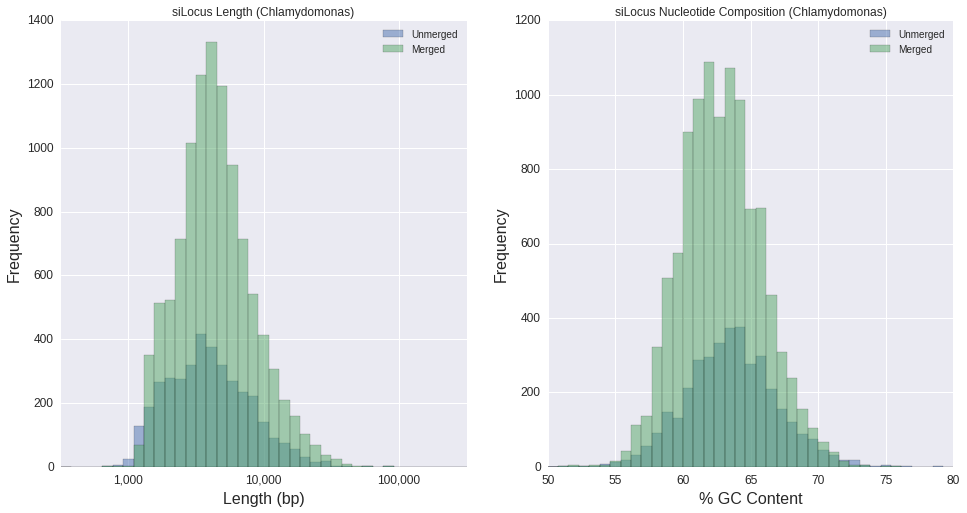

In [4]:
do_plots('Crei', 'Chlamydomonas', lengthticks=[3, 4, 5], lengthticklabs=['1,000', '10,000', '100,000'],
         lengthbins=numpy.linspace(2.5, 5.5, 40), gcbins=numpy.linspace(50, 80, 40))

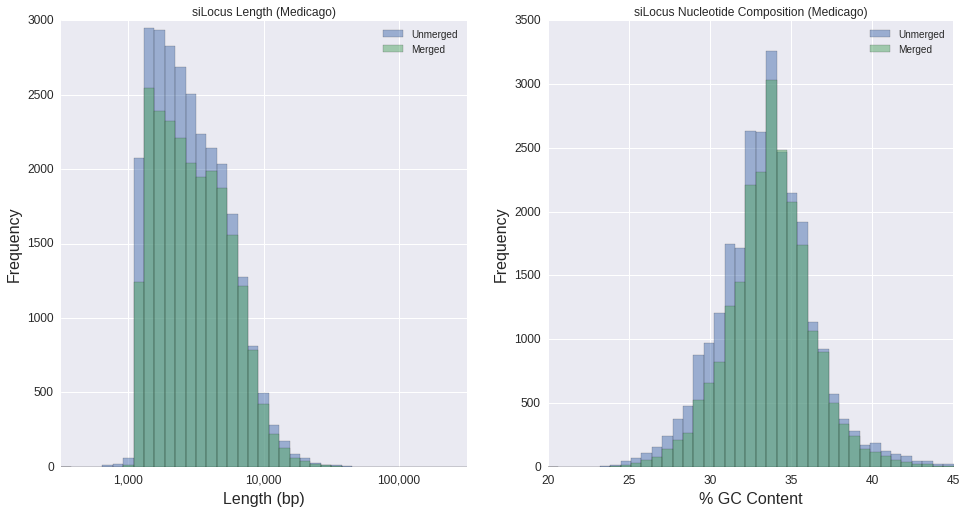

In [5]:
do_plots('Mtru', 'Medicago', lengthticks=[3, 4, 5], lengthticklabs=['1,000', '10,000', '100,000'],
         lengthbins=numpy.linspace(2.5, 5.5, 40), gcbins=numpy.linspace(20, 45, 40))

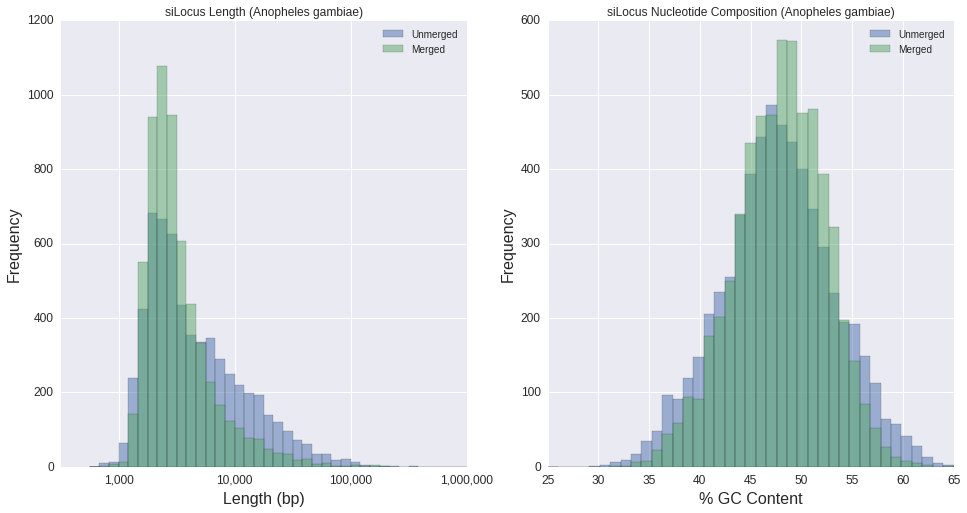

In [6]:
do_plots('Agam', 'Anopheles gambiae', gcbins=numpy.linspace(25, 65, 40))

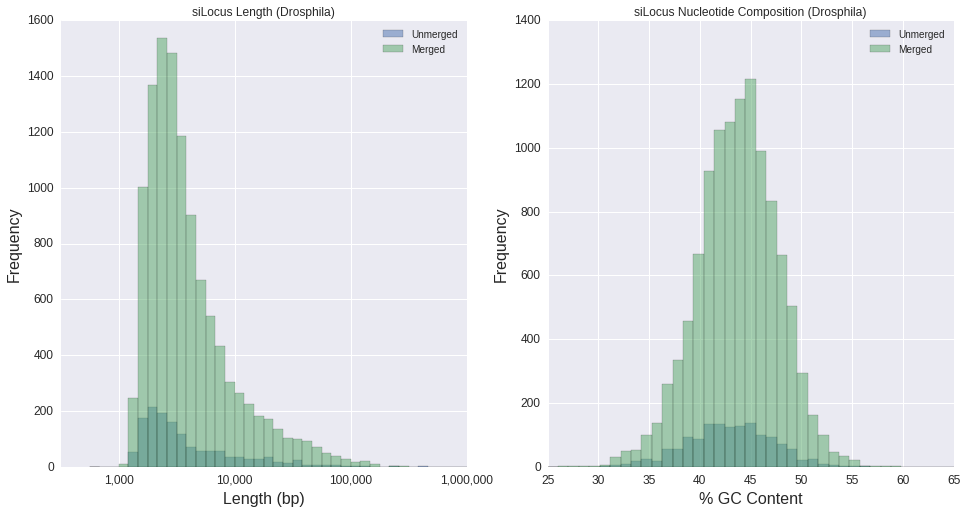

In [7]:
do_plots('Dmel', 'Drosphila', gcbins=numpy.linspace(25, 65, 40))

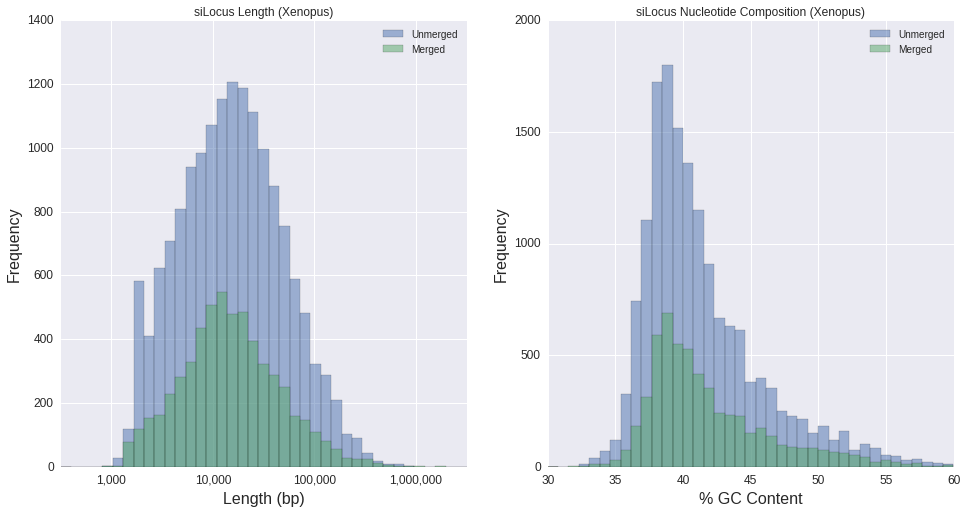

In [8]:
do_plots('Xtro', 'Xenopus', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(30, 60, 40))

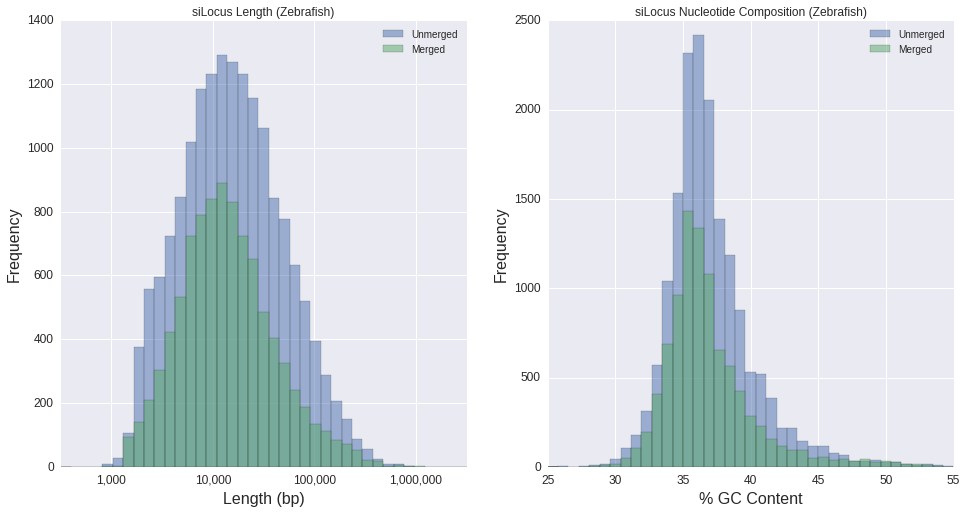

In [9]:
do_plots('Drer', 'Zebrafish', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(25, 55, 40))

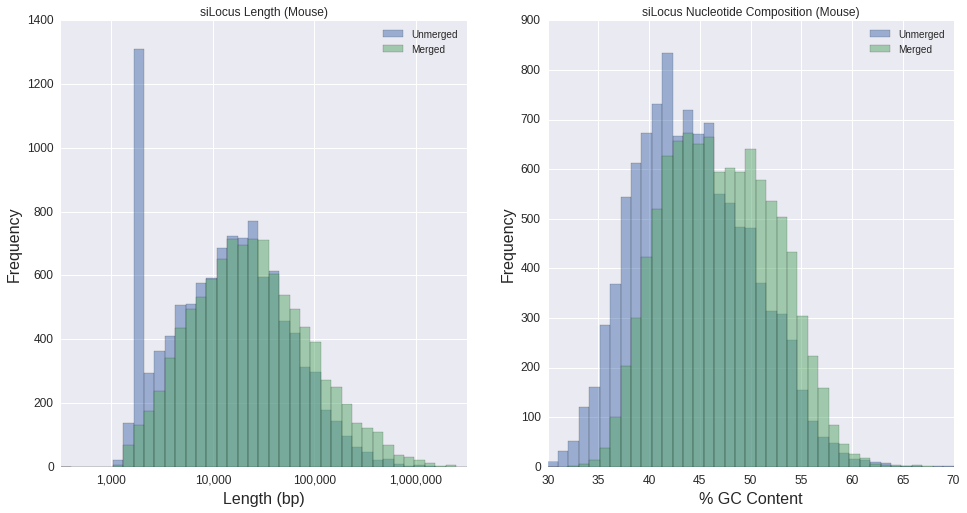

In [10]:
do_plots('Mmus', 'Mouse', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(30, 70, 40))

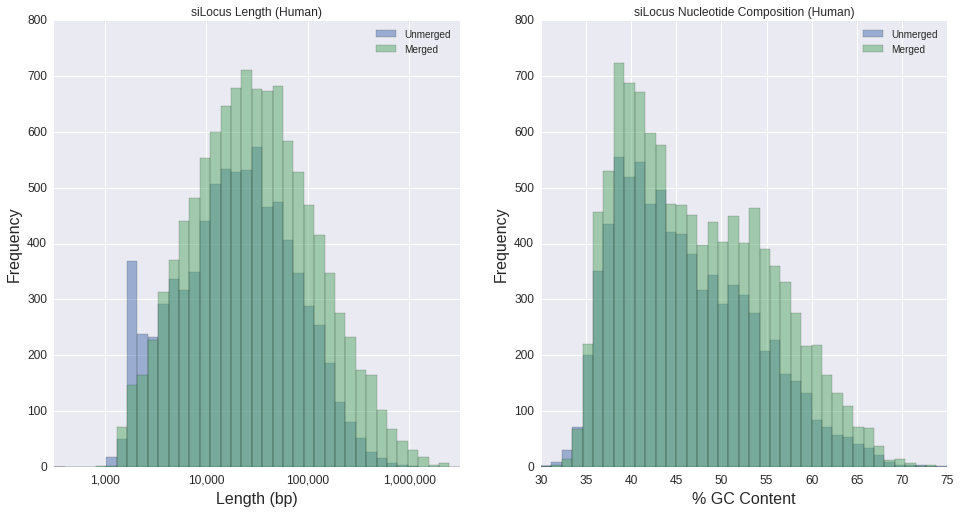

In [11]:
do_plots('Hsap', 'Human', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(30, 75, 40))

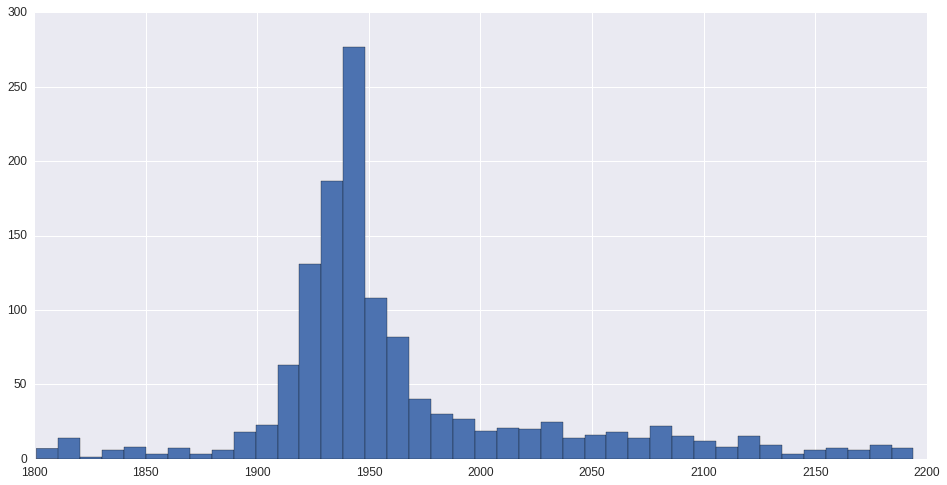

In [12]:
species = 'Mmus'
ilocusdata = pandas.read_table('species/{}/{}.iloci.tsv'.format(species, species))
milocusdata = pandas.read_table('species/{}/{}.miloci.tsv'.format(species, species))
ilocusdata['LogLength'] = numpy.log10(ilocusdata['Length'])
milocusdata['LogLength'] = numpy.log10(milocusdata['Length'])
siloci = ilocusdata.loc[(ilocusdata.LocusClass == 'siLocus')]
miloci = milocusdata.loc[(milocusdata.LocusClass == 'miLocus')]
singleton_siloci = milocusdata.loc[(milocusdata.LocusClass == 'siLocus')]
peak = singleton_siloci.loc[(singleton_siloci.Length > 1800) & (singleton_siloci.Length < 2200)]
_ = plt.hist(peak['Length'], bins=40)

In [13]:
ioi = siloci.loc[(siloci.Length > 1920) & (siloci.Length < 1980)]
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
24819,Mmus,MmusILC-24820,NC_000073.6,NC_000073.6_108211083-108213027,1945,1945,0.383,0.124,0.0,siLocus,1,False,NaN,3.288920
26438,Mmus,MmusILC-26439,NC_000074.6,NC_000074.6_21064538-21066501,1964,1964,0.403,-0.008,0.0,siLocus,1,False,NaN,3.293141
22072,Mmus,MmusILC-22073,NC_000073.6,NC_000073.6_20441170-20443093,1924,1924,0.379,0.079,0.0,siLocus,1,False,NaN,3.284205
44948,Mmus,MmusILC-44949,NC_000080.6,NC_000080.6_50083214-50085179,1966,1966,0.373,0.123,0.0,siLocus,1,False,NaN,3.293584
18767,Mmus,MmusILC-18768,NC_000072.6,NC_000072.6_43152807-43154739,1933,1933,0.447,-0.133,0.0,siLocus,1,False,NaN,3.286232


In [14]:
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
29676,Mmus,MmusILC-29677,NC_000075.6,NC_000075.6_38060822-38062751,1930,1930,0.384,-0.020,0.0,siLocus,1,False,NaN,3.285557
22104,Mmus,MmusILC-22105,NC_000073.6,NC_000073.6_21011032-21012955,1924,1924,0.374,0.074,0.0,siLocus,1,False,NaN,3.284205
24063,Mmus,MmusILC-24064,NC_000073.6,NC_000073.6_86362876-86364835,1960,1960,0.360,-0.045,0.0,siLocus,1,False,NaN,3.292256
26448,Mmus,MmusILC-26449,NC_000074.6,NC_000074.6_21191073-21193050,1978,1978,0.418,0.007,0.0,siLocus,1,False,NaN,3.296226
29776,Mmus,MmusILC-29777,NC_000075.6,NC_000075.6_39216859-39218794,1936,1936,0.348,-0.136,0.0,siLocus,1,False,NaN,3.286905


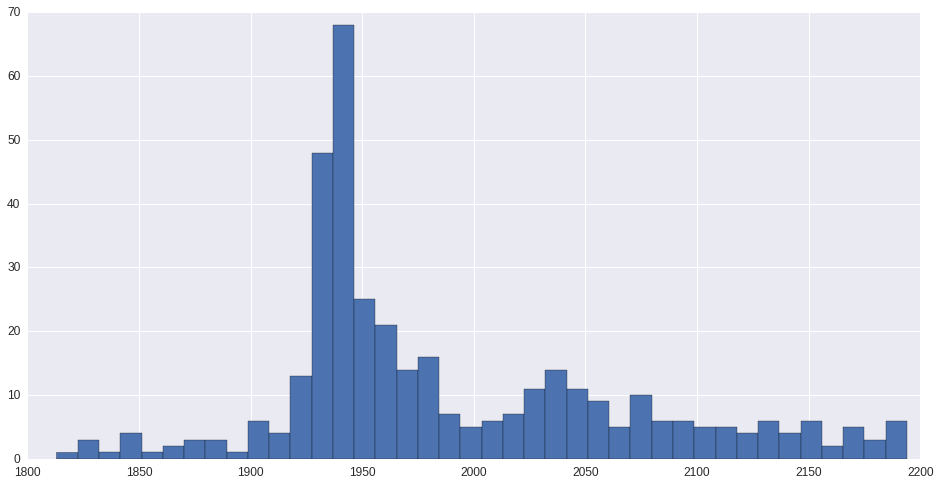

In [15]:
species = 'Hsap'
ilocusdata = pandas.read_table('species/{}/{}.iloci.tsv'.format(species, species))
milocusdata = pandas.read_table('species/{}/{}.miloci.tsv'.format(species, species))
ilocusdata['LogLength'] = numpy.log10(ilocusdata['Length'])
milocusdata['LogLength'] = numpy.log10(milocusdata['Length'])
siloci = ilocusdata.loc[(ilocusdata.LocusClass == 'siLocus')]
miloci = milocusdata.loc[(milocusdata.LocusClass == 'miLocus')]
singleton_siloci = milocusdata.loc[(milocusdata.LocusClass == 'siLocus')]
peak = singleton_siloci.loc[(singleton_siloci.Length > 1800) & (singleton_siloci.Length < 2200)]
_ = plt.hist(peak['Length'], bins=40)

In [16]:
ioi = siloci.loc[(siloci.Length > 1920) & (siloci.Length < 1980)]
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
23493,Hsap,HsapILC-23494,NC_000007.14,NC_000007.14_99875562-99877533,1972,1972,0.419,0.027,0.0,siLocus,1,False,NaN,3.294907
32291,Hsap,HsapILC-32292,NC_000011.10,NC_000011.10_6891074-6893000,1927,0,0.412,0.057,0.0,siLocus,1,False,NaN,3.284882
57962,Hsap,HsapILC-57963,NC_000023.11,NC_000023.11_131543574-131545500,1927,1927,0.415,-0.090,0.0,siLocus,1,False,NaN,3.284882
5727,Hsap,HsapILC-05728,NC_000001.11,NC_000001.11_248294116-248296078,1963,1963,0.441,0.073,0.0,siLocus,1,False,NaN,3.292920
58507,Hsap,HsapILC-58508,NC_000024.10,NC_000024.10_3578585-3580541,1957,1957,0.438,-0.001,0.0,siLocus,1,False,NaN,3.291591


In [17]:
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
3773,Hsap,HsapILC-03774,NC_000001.11,NC_000001.11_158419428-158421366,1939,1939,0.429,0.079,0.0,siLocus,1,False,NaN,3.287578
24404,Hsap,HsapILC-24405,NC_000007.14,NC_000007.14_143477373-143479296,1924,0,0.485,0.039,0.0,siLocus,1,False,NaN,3.284205
27333,Hsap,HsapILC-27334,NC_000009.12,NC_000009.12_21215873-21217811,1939,1939,0.341,-0.006,0.0,siLocus,1,False,NaN,3.287578
28544,Hsap,HsapILC-28545,NC_000009.12,NC_000009.12_104604171-104606127,1957,1957,0.383,0.083,0.0,siLocus,1,False,NaN,3.291591
32131,Hsap,HsapILC-32132,NC_000011.10,NC_000011.10_4544691-4546644,1954,1954,0.431,-0.082,0.0,siLocus,1,False,NaN,3.290925
